# **Reinforcement Learning**
<img align="right" src="https://vitalflux.com/wp-content/uploads/2020/12/Reinforcement-learning-real-world-example.png">

- In reinforcement learning, your system learns how to interact intuitively with the environment by basically doing stuff and watching what happens.

if you need the last version of gym use block of code below:
```
!pip uninstall gym -y
!pip install gym
```

In [1]:
# !pip install -U gym==0.25.2
!pip install gym[atari]
!pip install autorom[accept-rom-license]
!pip install swig
!pip install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=e2c7fedfbbb79bb62ad48890256801a2404a1443f436d2863d120a74b4c82e9e
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.3 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.w

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython.core.display import HTML
from base64 import b64encode
from gym.wrappers import record_video, record_episode_statistics
from gym.wrappers import RecordVideo, RecordEpisodeStatistics
import torch
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
def display_video(episode=0, video_width=600, video_dir= "/content/video"):

    video_path = os.path.join(video_dir, f"rl-video-episode-{episode}.mp4")
    video_file = open(video_path, "rb").read()
    decoded = b64encode(video_file).decode()
    video_url = f"data:video/mp4;base64,{decoded}"
    return HTML(f"""<video width="{video_width}"" controls><source src="{video_url}"></video>""")

def create_env(name, render_mode=None, video_folder='/content/video'):
    # render mode: "human", "rgb_array", "ansi")
    env = gym.make(name, new_step_api=True, render_mode=render_mode)
    env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 50 == 0)
    env = RecordEpisodeStatistics(env)
    return env

def show_reward(total_rewards):
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

## **Understanding the Markov Decision Process (MDP)**

**Future is Independent of the past**

&nbsp; &nbsp; In mathematics, a Markov decision process (MDP) is a discrete-time stochastic control process. It provides a mathematical framework for modeling decision making in situations where outcomes are partly random and partly under the control of a decision maker. MDPs are useful for studying optimization problems solved via dynamic programming.

**Transition** : Moving from one state to another is called Transition.

**Transition Probability (T)**: The probability that the agent will move from one
state to another is called transition probability.

<br>

<img align='right' width='400' src="https://miro.medium.com/v2/resize:fit:860/format:webp/1*MBcie302iU3qbQPbhU0psw.png">

&nbsp; &nbsp; The edges of the tree denote transition probability. From this chain let’s take some sample.

&nbsp; &nbsp; Now, suppose that we were sleeping and the according to the probability distribution there is a 0.6 chance that we will Run and 0.2 chance we sleep more and again 0.2 that we will eat ice-cream.

- you can see transition matrix below (each row for one state):

$$
\begin{bmatrix}
0.2 & 0.6 & 0.2\\
0.1 & 0.6 & 0.3 \\
0.2 & 0.7 & 0.1
\end{bmatrix}
$$

<br>
<br>
<br>


- **The return Gt is the total discounted reward from time-step t**

$\large Gt =R_{t+1}+γR_{t+2}+...=\sum_{k=0}^{\infty}γ^kR_{t+k+1}$

<img align='left' width='350' src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*p5KQnP1rwTcXFooMF0n-TA.png">

<br>
<br>
<br>
Suppose our start state is Class 2,
Class 2 > Class 3 > Pass > Sleep.
<br>
$γ = 0.5$
$G_t = -2 + (-2 * 0.5) + (10 * 0.25) +0 = -0.5$

## **Bellman Equation for Value Function**

Bellman Equation helps us to find optimal policies and value functions.

$ V_{t+1} = R + \gamma * T * V_{t} $
<br>

when the value converges, which means $ V_{t+1} = V_{t}$:

<br>

$$   
V - \gamma * T * V = R \\
V(I - \gamma * T) = R \\
V = (I - \gamma * T)^{-1} * R
$$

<br>

**Create and MDP:**
- we have invironment consist of:

$
S = [s_0, s_1, s_2], \hspace{6mm} A = [a_0, a_1], \\
transition \hspace{1mm} matrix: T(s, a, s^{'}), \\
discount \hspace{2mm} factor: \gamma
$

<br>

- for the first time we don't want to implement to complex model so we assume optimal policy select first action in all circumstances. $ \hspace{1mm}{action = a_0} $ which means it would be 0 all the time.
- define reward function and discount factor



In [4]:
def calc_value_matrix_inv(gamma, trans_matrix, rewards):
    inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * trans_matrix)
    v = torch.mm(inv, rewards.reshape(-1, 1))
    return v

In [5]:
T = torch.tensor(
    [[[0.8, 0.1, 0.1],
      [0.1, 0.6, 0.3]],
     [[0.7, 0.2, 0.1],
      [0.1, 0.8, 0.1]],
     [[0.6, 0.2, 0.2],
      [0.1, 0.4, 0.5]]]
)

R = torch.tensor([1., 0., -1.])
gammas = [0, 0.5, 0.99]
action = 0

Trans_matrix = T[:, action]
for gamma in gammas:
    v = calc_value_matrix_inv(gamma, Trans_matrix, R)
    print(f"The value function under he optimal policy and discount factor = {gamma} is: \n{v.numpy()} \n")

The value function under he optimal policy and discount factor = 0 is: 
[[ 1.]
 [ 0.]
 [-1.]] 

The value function under he optimal policy and discount factor = 0.5 is: 
[[ 1.6786704 ]
 [ 0.62603873]
 [-0.48199445]] 

The value function under he optimal policy and discount factor = 0.99 is: 
[[65.8293 ]
 [64.71942]
 [63.4876 ]] 



## **Performing Policy evalulation**
&nbsp;&nbsp;we have just developed an MDP and computed the value function of the optimal policy using matrix inversion.

&nbsp;&nbsp;policy evaluation is a iterative algorithm. It starts with arbitrary policy values and then iteratively update the values base on **Bellman expectation equation** until they converge. In each iteration value of a policy $\pi$, for state $S$ is updated as follow:

<br>

$$
\large \textit{Bellman expectation equation:}\\
V(s) = \sum_{a}{\pi(s, a)\left[R(s,a) +
\gamma\sum_{s^{'}}{T(s,a,s^{'})V(s^{'})}\right]}
$$

In [6]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshhold):
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    v_history = [V]
    while True:
        v_temp = torch.zeros(n_state)
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                sigma = torch.dot(trans_matrix[state, action], V)
                v_temp[state] += action_prob * (rewards[state] + gamma * sigma)

        delta = torch.max(torch.abs(V - v_temp))
        V = v_temp.clone()
        v_history.append(V)
        if delta <= threshhold:
            break
    return V, v_history

In [7]:
T = torch.tensor(
    [[[0.8, 0.1, 0.1],
      [0.1, 0.6, 0.3]],
     [[0.7, 0.2, 0.1],
      [0.1, 0.8, 0.1]],
     [[0.6, 0.2, 0.2],
      [0.1, 0.4, 0.5]]]
)

R = torch.tensor([1., 0., -1.])
gamma = 0.5
policy_optimal = torch.tensor(
    [[1., 0.],
     [1., 0.],
     [1., 0.]]
)
threshhold = 0.0001

V, _ = policy_evaluation(policy_optimal, T, R, gamma, threshhold)
print(f"the value function under the optimal policy is: \n{V.numpy()}")

the value function under the optimal policy is: 
[ 1.6785905   0.6259589  -0.48207426]


In [8]:
policy_optimal = torch.tensor(
    [[.5, .5],
     [.5, .5],
     [.5, .5]]
)

V, v_history = policy_evaluation(policy_optimal, T, R, gamma, threshhold)
print(f"the value function under the optimal policy is: \n{V.numpy()}")

the value function under the optimal policy is: 
[ 1.2347662   0.26914817 -0.90129805]


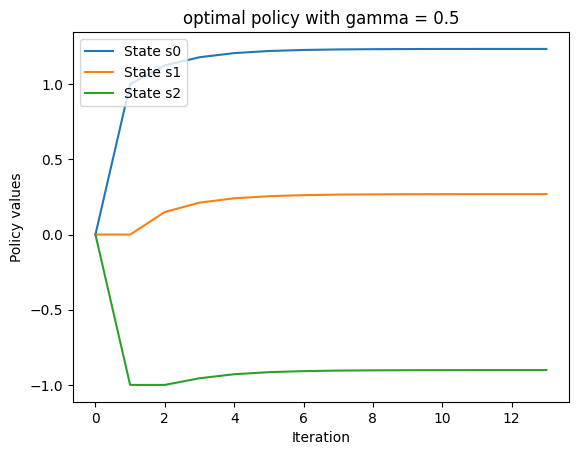

In [9]:
s0, = plt.plot([v[0] for v in v_history])
s1, = plt.plot([v[1] for v in v_history])
s2, = plt.plot([v[2] for v in v_history])
plt.title(f"optimal policy with gamma = {gamma}")
plt.xlabel("Iteration")
plt.ylabel("Policy values")
plt.legend([s0, s1, s2], ["State s0", "State s1", "State s2"], loc="upper left")
plt.show()

## **Frozen Lake Environment**
<center><img align="center" width="200" src="https://www.gymlibrary.dev/_images/frozen_lake.gif">

In [10]:
env = create_env("FrozenLake-v1")

## **Value iteration algorithm**

An MDP is considered solved if it's optinal policy is found. we will figure out the optimal policy for the Frozen Lake environment using **value iteration**

The behind this algorithm is quite similar to that of policy evaluation, It is also an iterative algorithm. It starts with arbitrary policy value and the iteratively updates the values base on **Bellman optimality equation**. So in each iteration instead of taking the expectation(average) of values across all actions, it pick the action that achieve the maximal policy values:

<br>

$$
\large\textit{Bellman optimality equations:}\\
V^{*}(s) := max_{a}\left[R(s,a) +
\gamma\sum_{s^{'}}{T(s,a,s^{'})V^{*}(s^{'})}\right]
$$
or
$$
V^{*}(s) := max_{a}\sum_{s^{'}}{T(s,a,s^{'})}
\left[R(s,a, s^{'}) + \gamma V^{*}(s^{'})\right]
$$

<br>

Once the optimal values are computed, we can easily obtain the obtimal policy acccordingly:

$$
\pi^{*}(s) := argmax_{a}\sum_{s^{'}}{T(s,a,s^{'})}
\left[R(s,a, s^{'}) + \gamma V^{*}(s^{'})\right]
$$

<br>

- **Gym Environment**

```
env.env.P[s][a] --> Transition_matrix_Prob, next_state, reward, info
```
we going to use above function for value iteration algorithm

In [11]:
def value_iteration(env, gamma, threshhold):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    V = torch.zeros(n_state)
    while True:
        v_temp = torch.empty(n_state)
        for state in range(n_state):
            v_action = torch.zeros(n_action)
            for action in range(n_action):
                for T_prob, s_prime, R, _ in env.env.P[state][action]:
                    v_action[action] += T_prob * (R + gamma * V[s_prime].item())

            v_temp[state] = torch.max(v_action)

        delta = torch.max(torch.abs(V - v_temp))
        V = v_temp.clone()
        if delta <= threshhold:
            break
    return V


def optimal_policy(env, optimal_value, gamma):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    policy = torch.zeros(n_state)
    for state in range(n_state):
        v_action = torch.zeros(n_action)
        for action in range(n_action):
            for T_prob, s_prime, R, _ in env.env.P[state][action]:
                v_action[action] += T_prob * (R + gamma * optimal_value[s_prime].item())

        policy[state] = torch.argmax(v_action)

    return policy

In [12]:
gamma = 0.99
threshhold = 0.0001
v_optimal = value_iteration(env, gamma, threshhold)
optimal_policy = optimal_policy(env, v_optimal, gamma).long()

In [13]:
def run_episode(env, policy):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = policy[state].item()
        state, reward, done, _ =  env.step(action)
        total_reward += reward

    return total_reward

In [16]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [17]:
# env = create_env("FrozenLake-v1")
n_episode = 500
total_rewards = []
for episode in range(n_episode):
    R = run_episode(env, optimal_policy)
    total_rewards.append(R)

    if episode % 50 == 0 and episode > 0:
        avg_tot_reward = sum(total_rewards) / episode
        print(f"Average total reward over {episode} episodes: {avg_tot_reward:.2f}")


Average total reward over 50 episodes: 0.68
Average total reward over 100 episodes: 0.64
Average total reward over 150 episodes: 0.67
Average total reward over 200 episodes: 0.71
Average total reward over 250 episodes: 0.72
Average total reward over 300 episodes: 0.74
Average total reward over 350 episodes: 0.74
Average total reward over 400 episodes: 0.74
Average total reward over 450 episodes: 0.74


In [18]:
display_video(450)

## **Policy iteration algorithm**
this algorithm can be divided into two components:
1. policy evaluation
2. policy improvment

It starts with an arbitrary policy, And each iteration, It first computes the policy values given the latest policy, Based on the $\normalsize\textit{Bellman expectation equation}$; It then extract an improved policy out the resulting policy values, Based on the $\normalsize\textit{Bellman optimality equation}$. It iteratively evaluates the policy and generates an improved version until the policy doesn't change any more.

<br>

$$
\large \textit{Bellman expectation equation:}\\
V(s) = \sum_{a}{\pi(s, a)\left[R(s,a) +
\gamma\sum_{s^{'}}{T(s,a,s^{'})V(s^{'})}\right]}
$$

<br>

$$
\large\textit{Bellman optimality equation}\\
\pi^{*}(s) := argmax_{a}\sum_{s^{'}}{T(s,a,s^{'})}
\left[R(s,a, s^{'}) + \gamma V^{*}(s^{'})\right]
$$

In [19]:
def policy_evaluation(env, policy, gamma, threshhold):
    n_state = env.observation_space.n
    V = torch.zeros(n_state)
    while True:
        v_temp = torch.zeros(n_state)
        for state in range(n_state):
            action = policy[state].item()
            for T_prob, s_prime, R, _ in env.env.P[state][action]:
                v_temp[state] += T_prob * (R + gamma * V[s_prime].item())

        delta = torch.max(torch.abs(V - v_temp))
        V = v_temp.clone()
        if delta <= threshhold:
            break
    return V


def policy_improvment(env, optimal_value, gamma):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    policy = torch.zeros(n_state)
    for state in range(n_state):
        v_action = torch.zeros(n_action)
        for action in range(n_action):
            for T_prob, s_prime, R, _ in env.env.P[state][action]:
                v_action[action] += T_prob * (R + gamma * optimal_value[s_prime].item())

        policy[state] = torch.argmax(v_action)

    return policy

def policy_iteration(env, gamma, threshhold):
    n_state = env.observation_space.n
    n_action = env.action_space.n
    policy = torch.randint(high=n_action, size=(n_state,)).float()

    while True:
        V = policy_evaluation(env, policy, gamma, threshhold)
        policy_improved = policy_improvment(env, V, gamma)
        if torch.equal(policy_improved, policy):
            return V, policy_improved

        policy = policy_improved

In [20]:
env = create_env("FrozenLake-v1")
gamma = 0.99
threshhold = 0.0001
v_optimal, policy_improved = policy_iteration(env, gamma, threshhold)

print(f"Optimal value: \n{v_optimal}\n")
print(f"optimal policy: \n{policy_improved}\n")

Optimal value: 
tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])

optimal policy: 
tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])



In [21]:
n_episode = 500
total_rewards = []
for episode in range(n_episode):
    R = run_episode(env, policy_improved.long())
    total_rewards.append(R)

    if episode % 50 == 0 and episode > 0:
        avg_tot_reward = sum(total_rewards) / episode
        print(f"Average total reward over {episode} episodes: {avg_tot_reward:.2f}")

Average total reward over 50 episodes: 0.78
Average total reward over 100 episodes: 0.79
Average total reward over 150 episodes: 0.77
Average total reward over 200 episodes: 0.74
Average total reward over 250 episodes: 0.73
Average total reward over 300 episodes: 0.75
Average total reward over 350 episodes: 0.74
Average total reward over 400 episodes: 0.73
Average total reward over 450 episodes: 0.74


In [22]:
display_video(450)